In [1]:
from keras import models, layers, optimizers
from keras.preprocessing import image
import matplotlib.pyplot as plt

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [3]:
train_datagen = image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)
train_generator = train_datagen.flow_from_directory(
    'dogs_cats/train',
    target_size=(150, 150), batch_size=20,
    class_mode='binary')

test_datagen = image.ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    'dogs_cats/test',
    target_size=(150, 150), batch_size=20,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    'dogs_cats/validation',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [4]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)
model.save('dogs_cats/scratch.h5')

Epoch 1/30
100/100 [==============================] - 22s 219ms/step - loss: 0.6929 - acc: 0.5160 - val_loss: 0.6859 - val_acc: 0.5533
Epoch 2/30
100/100 [==============================] - 17s 173ms/step - loss: 0.6806 - acc: 0.5450 - val_loss: 0.6680 - val_acc: 0.5895
Epoch 3/30
100/100 [==============================] - 17s 172ms/step - loss: 0.6738 - acc: 0.5825 - val_loss: 0.6458 - val_acc: 0.6003
Epoch 4/30
100/100 [==============================] - 17s 174ms/step - loss: 0.6592 - acc: 0.5965 - val_loss: 0.6200 - val_acc: 0.6453
Epoch 5/30
100/100 [==============================] - 17s 173ms/step - loss: 0.6391 - acc: 0.6350 - val_loss: 0.6109 - val_acc: 0.6618
Epoch 6/30
100/100 [==============================] - 17s 171ms/step - loss: 0.6161 - acc: 0.6480 - val_loss: 0.8270 - val_acc: 0.5425
Epoch 7/30
100/100 [==============================] - 17s 172ms/step - loss: 0.6138 - acc: 0.6615 - val_loss: 0.5883 - val_acc: 0.6739
Epoch 8/30
100/100 [==============================] - 1

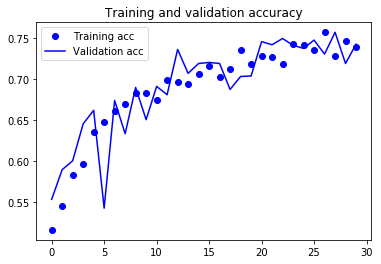

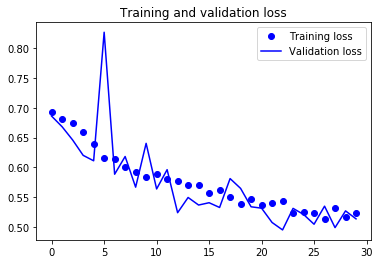

In [5]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()